# Example usage

This notebook will show how to get started with the `databallpy` package. The package is build around the `Match` class. All information about match is saved in this class. Amoung others, the class has attributes `tracking_data`, `event_data`, `home_players`, `away_score`, and `home_formation`. For more information on the `Match` class see our [documentation](https://databallpy.readthedocs.io/en/latest/autoapi/databallpy/index.html "databallpy documentation"). 

To use obtain a `Match` using `databallpy` in a project, run the following code:

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip --quiet
!{sys.executable} -m pip install databallpy --quiet

In [2]:
import databallpy
print(databallpy.__version__)

0.2.3


In [3]:
# obtain a match object
from databallpy import get_match, get_open_match

# get match from private data
# match = get_match(
#     tracking_data_loc="../data/test tracking data.dat",
#     tracking_metadata_loc="../data/test metadata.xml",
#     tracking_data_provider="tracab",
#     event_data_loc="../data/test f24.xml",
#     event_metadata_loc="../data/test f7.xml",
#     event_data_provider="opta"   
# )

# or use open metric data
match = get_open_match(verbose=False)

In [4]:
match.tracking_data.iloc[365:375][["frame", "ball_x", "ball_y", "home_1_x", "away_20_y"]]

timestamp   ball_x   ball_y  home_1_x  away_20_y
365        366 -0.05040  0.87108 -14.39025    5.66984
366        367 -0.03360  0.87176 -14.36190    5.68412
367        368 -0.01680  0.87244 -14.33355    5.70180
368        369 -0.00000  0.87380 -14.30625    5.71472
369        370  0.01575  0.87448 -14.27895    5.72900
370        371  0.03255  0.87516 -14.24955    5.73784
371        372  0.04935  0.87584 -14.22015    5.74872
372        373  0.06615  0.87652 -14.19285    5.76096
373        374  0.08190  0.87788 -14.16870    5.76776
374        375  0.09870  0.87856 -14.14560    5.78204

In [5]:
match.event_data.iloc[:10][["event", "seconds", "player_name"]]

event  seconds player_name
0  set piece    14.44   Player 10
1       pass    14.44   Player 10
2      carry    15.08    Player 7
3       pass    15.36    Player 7
4      carry    17.04    Player 8
5       pass    18.60    Player 8
6      carry    20.28    Player 2
7       pass    21.20    Player 2
8      carry    23.20    Player 3
9       pass    23.92    Player 3

In [6]:
match.home_players.iloc[:10][["id", "full_name", "shirt_num"]]

id  full_name  shirt_num
0  3578  Player 11         11
1  3568   Player 1          1
2  3569   Player 2          2
3  3570   Player 3          3
4  3571   Player 4          4
5  3572   Player 5          5
6  3573   Player 6          6
7  3574   Player 7          7
8  3575   Player 8          8
9  3576   Player 9          9

# Save Match Clip

A second functionality is in saving match clips of the event data. To save a match clip, run the following code:

In [7]:
from databallpy.visualize import save_match_clip

# saving match clip from the index 1065 to 1165, with a frame rate of 25 fps (4 seconds of the match).
save_match_clip(match, 1065,1165, save_folder="example_data", title="example", verbose=False)

In [8]:
from IPython.display import HTML

HTML("""
    <video alt="save match clip" width="640" height="480" controls>
        <source src="https://raw.githubusercontent.com/Alek050/databallpy/main/docs/example_data/example.mp4" type="video/mp4">
    </video>
""")

# Plot events

Also, events can be plotted. You can specify the event, the outcome, the player, and the team. For instance, if you want all passes of the home team plotted, colored by the outcome of the pass you can use the following code:

Found 20 matching events


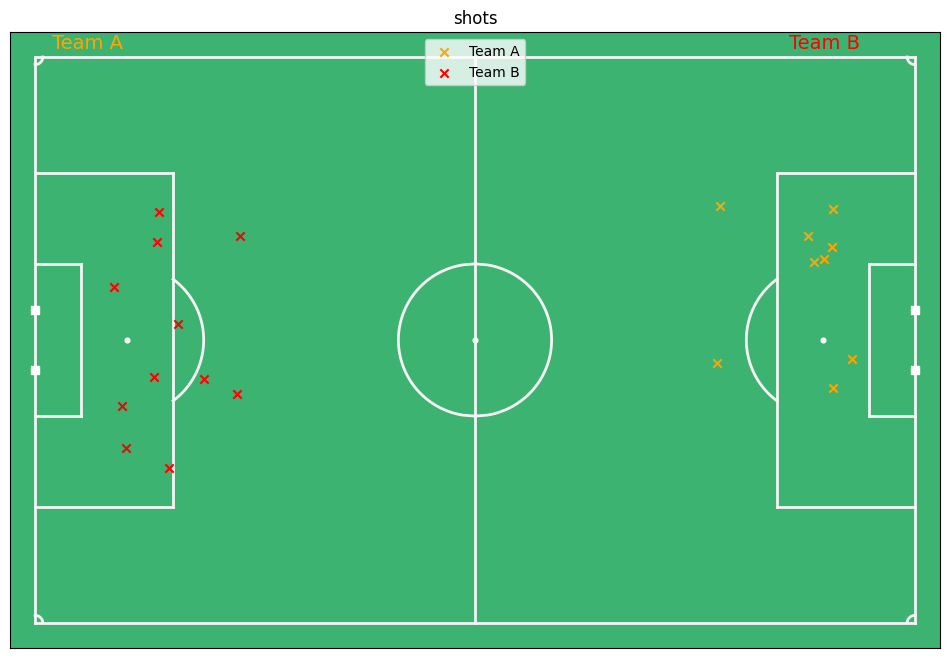

In [9]:
from databallpy.visualize import plot_events
import matplotlib.pyplot as plt

fig, ax = plot_events(match, events=["shot"], color_by_col="team_id", title="shots")
plt.show()

As you can see, the home team is represented as playing from left to right for the whole match and the away team from right to left, this is the same for the tracking data.

# Synchronise tracking and event data

Lastly, you can also smartly synchronise the tracking and event data. Synchronisation of tracking and event data is usefull when making, for example, expected goal models. Often the event and tracking data do not perfectly align on match time alone. Our model uses the Needleman-Wunsch algorithm proposed by [this](https://kwiatkowski.io/sync.soccer) article to synchronize the data.

Note: for Metrica data is not really useful since they deliver synchronised event and tracking data, however, when you have tracking data from a different provider as the event data ( for instance Tracab and Opta), this function is very usefull.

To synchronise the tracking and event data run:

In [10]:
import pandas as pd

match.synchronise_tracking_and_event_data(n_batches_per_half=100, verbose=False)
match.tracking_data.loc[~pd.isnull(match.tracking_data["event"]), ["event", "event_id"]]

event  event_id
360     pass       2.0
383     pass       4.0
464     pass       6.0
529     pass       8.0
597     pass      10.0
...      ...       ...
143122  pass    3610.0
143189  pass    3612.0
143265  pass    3613.0
143405  pass    3616.0
143468  pass    3617.0

[1481 rows x 2 columns]

Now all relevant events are coupled to specific frames of the tracking data.

In [11]:
# to check, for instance run:
save_match_clip(match, 10300, 11000, save_folder="example_data", title="synced_metrica", events=["pass"], verbose=False)

In [12]:
HTML("""
    <video alt="save match clip" width="640" height="480" controls>
        <source src="https://raw.githubusercontent.com/Alek050/databallpy/main/docs/example_data/synced_metrica.mp4" type="video/mp4">
    </video>
""")